# Tree method 

used in classification and regression. if data is binary then the problem is a classifcation problem. the tree method creates a decision tree looking at each column and its possibilities to graphically represent what variable in that column lead to how many ture and how many false results 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
df=pd.read_csv(r'D:\datasets\archive\Entities.csv')
df=df.drop(['agency','agent','date_added','page_url','location_id','property_id','Unnamed: 0'],axis=1)
df['property_type']=df['property_type'].replace({'Flat':0,'House':1,'Penthouse':2,'Farm House':3,'Lower Portion':4,'Upper Portion':5,'Room':6})
df['city']=df['city'].replace({'Islamabad':0, 'Lahore':1, 'Faisalabad':2, 'Rawalpindi':3, 'Karachi':4})
df=df.drop(['province_name','location'],axis=1)
df['purpose']=df['purpose'].replace({'For Sale':0, 'For Rent':1})
x=df.drop('price',axis=1) #INPUT
y=df['price'] #output
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3)


# decision tree

In [2]:
from sklearn.tree import DecisionTreeRegressor

In [3]:
dtree = DecisionTreeRegressor()

In [4]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [5]:
dtree.get_depth

<bound method BaseDecisionTree.get_depth of DecisionTreeRegressor()>

# visualisation of tree 

In [6]:
from sklearn import tree

In [7]:
text_representation = tree.export_text((dtree))

In [8]:
print(text_representation)

|--- feature_6 <= 4.50
|   |--- feature_5 <= 0.50
|   |   |--- feature_7 <= 42743.41
|   |   |   |--- feature_7 <= 21643.91
|   |   |   |   |--- feature_2 <= 24.83
|   |   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |   |--- feature_6 <= 2.50
|   |   |   |   |   |   |   |--- feature_2 <= 24.77
|   |   |   |   |   |   |   |   |--- feature_6 <= 1.50
|   |   |   |   |   |   |   |   |   |--- feature_7 <= 7486.90
|   |   |   |   |   |   |   |   |   |   |--- value: [25000000.00]
|   |   |   |   |   |   |   |   |   |--- feature_7 >  7486.90
|   |   |   |   |   |   |   |   |   |   |--- feature_7 <= 16607.31
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- feature_7 >  16607.31
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |--- feature_6 >  1.50
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 24.75
|   |   |   |   |   |   |   |   |   |   |--- v

In [9]:
# above is a text visualisation method 

In [10]:
# for a graphical representation 

In [11]:
fig = plt.figure(figsize=(25,20))

<Figure size 1800x1440 with 0 Axes>

[Text(0.7139232523674193, 0.9893617021276596, 'bedrooms <= 4.5\nsquared_error = 1284712794391471.2\nsamples = 117912\nvalue = 17818456.024'),
 Text(0.5329692230726809, 0.9680851063829787, 'purpose <= 0.5\nsquared_error = 499986398193552.6\nsamples = 88802\nvalue = 10565605.618'),
 Text(0.3983597364957813, 0.9468085106382979, 'Total_Area <= 42743.406\nsquared_error = 660924050354799.4\nsamples = 60111\nvalue = 15575884.381'),
 Text(0.30046181086162643, 0.925531914893617, 'Total_Area <= 21643.914\nsquared_error = 375351893466424.0\nsamples = 59082\nvalue = 14304251.109'),
 Text(0.14144634697248168, 0.9042553191489362, 'latitude <= 24.825\nsquared_error = 239252464372885.06\nsamples = 55348\nvalue = 13084480.27'),
 Text(0.010992972161979388, 0.8829787234042553, 'property_type <= 0.5\nsquared_error = 1052842383678825.6\nsamples = 2531\nvalue = 30371562.625'),
 Text(0.0047610174610974955, 0.8617021276595744, 'bedrooms <= 2.5\nsquared_error = 93268747684232.53\nsamples = 1677\nvalue = 148124

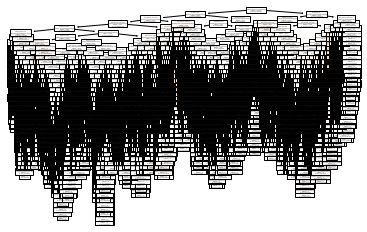

In [12]:
tree.plot_tree(dtree,filled=True,feature_names=X_train.columns,class_names='Price')

In [13]:
from sklearn.metrics import mean_absolute_error

In [14]:
y_prediction = dtree.predict(X_test)

In [15]:
mean_absolute_error(y_prediction,y_test)

3788127.439736239